<a href="https://colab.research.google.com/github/MaralAminpour/ML-BME-Course-UofA-Fall-2023/blob/main/Week-2-Introduction-to-machine-learning/2.5-Starting-with-sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Basics
## Starting with Scikit-learn

<img src="https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-2-Introduction-to-machine-learning/imgs/Scikit_learn_logo_.png" width = "150" style="float: right;">

In this notebook we will introduce the basics of the Scikit-learn application programming interface (API). Scikit-learn supports many **different machine learning models**, and also has many useful **supporting functions**. One nice feature of scikit-learn is that different models have **similar interfaces**, meaning there will be **minimal code changes required** to switch between one type of model to another.

We will cover very simple examples of (1) regression, (2) classification, (3) clustering and (4) dimensionality reduction.

## **Example 1. Regression**

We'll explore the topic of regression in depth in Week 4. This is just a simple overview for now.

###**Linear regression**

Regression problems we are** predicting a numerical quantity** (unlike with classification where we are **predicting a nominal label**).
The simplest form of regression is **linear regression** (also known as the least squares method). This is a problem from calculus that **tries to find a line that minimizes the squared distance from a collection of points.**

***From Wikipedia:** In linear regression, the **observations** (red) are assumed to be the result of **random deviations** (green) from an **underlying relationship** (blue) between a dependent variable (y) and an independent variable (x).*

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/200px-Linear_regression.svg.png)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/190px-Linear_least_squares_example2.png)


**Linear regression is like drawing a straight line through a bunch of points on a graph to find the best "average" line that represents the relationship between two things**. For example, you might want to know how the size of a house affects its price. With linear regression, you use existing data to find a formula that can then predict future prices based on the size of the house. It's a way to make educated guesses based on patterns you see in the data you already have.





---


### **Predicting house prices: A case study in regression**

One classic example that's super useful for understanding regression and it is usually ised to teach is house pricing. In this context, the **"intelligence" we're seeking to derive is the potential value of a house that's not currently on the market.** Our goal is to estimate this unknown value using data.

So, where does this data originate? For this case, we'll be studying other houses, using their **sale prices as a basis to infer the potential value of our target house**. But the sale price isn't the only factor we're considering. We'll also look at various characteristics of these houses, such as the number of bedrooms, bathrooms, and the total square footage, among other things.

**Our machine learning strategy will be to establish a relationship between these house features and their sale prices.** By successfully modeling this relationship with our data from past house sales, we can then use it to predict the sale price of a new house. In simpler terms, we'll be taking the new house's attributes to forecast its potential sale price. This practical technique is known as regression.

**Suggested videos and tutorials about predicting house prices**

1. Simple Linear Regression by Emily Fox (16 minutes)

check this video about gouse porice prediction and linear regression [here ](https://youtu.be/xsTmUtwUg9Q)

2. check the related tutorial by Smith White [here](https://colab.research.google.com/github/ualberta-rcg/python-machine-learning/blob/main/notebooks/02-regression.ipynb).


After this quick intro, let's roll up our sleeves and get started on our example:


---



### **Predict the brain volumes from GA**

The first example demonstrates the __regressor__ object API.

<img src="https://raw.githubusercontent.com/SirTurtle/ML-BME-UofA-imgs/main/Week-2-Introduction-to-machine-learning/imgs/brain-volume.png" width = "150" style="float: right;">

The file 'neonatal_brain_volumes.csv' contains gestational ages (GA) and brain volumes of premature babies. We will fit a `LinearRegression` model to **predict the brain volumes from GA.** This is an example of a regression problem.

The image on the right is an example of a **scan** that could be used to estimate brain volumes; however **the data we'll be using has the brain volumes already computed.**

**gestational ages (GA)**: The gestational age of a baby refers to the length of time a baby has been developing in the uterus, starting from the first day of the mother's last menstrual period to the current date. It is measured in weeks and days.

In [1]:
# This code will download the required data files from GitHub
# This is important so you can easily run the notebook on Colab
# Or if you want to run an example but have downloaded only notebook
# We'll use code like this in most of our notebooks
# Normally we'll put files we download in a directory called "temp"
#    This will help keep everything organized

import requests, os

# Download data from GitHub
def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'SirTurtle'
    repo = 'ML-BME-UofA-data'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

# Create the temp directory, if it doesn't already exist
if not os.path.exists('temp'):
   os.makedirs('temp')

download_data('Week-2-Introduction-to-machine-learning/data/neonatal_brain_volumes.csv', 'temp/neonatal_brain_volumes.csv')

### Prepare the data
First we will **import the data file using the `pandas` package** and check its content.

In [2]:
import pandas as pd

# Read file into a dataframe object
df = pd.read_csv('temp/neonatal_brain_volumes.csv')

# Print the first few lines
df.head()

,GA,brain volume
0,35.714,252.41
1,37.429,277.73
2,36.143,266.36
3,36.714,266.13
4,42.286,308.35


You could also open the data file with Excel or any program that can read a CSV formatted file to examine its contents.

#### Data dictionary

__Tip:__ It is a very good practice to create a data dictionary that describes **the structure of your data**. The data dictionary will have text about each column. It is useful to include info such as **units and acceptable values** when possible.

*GA*: gestational age (in weeks)

*brain volume*: measured brain volume (in mL)

Next, we will **convert the data into numpy arrays**. We will create a **feature matrix containing the 'GA' column** and the target vector **containing the 'brain volume' column**.

In [6]:
import numpy as np

# Convert dataframe object into a numpy array
brain_volume_data = df.to_numpy()
# Create the feature matrix and convert it to a 2D numpy array
# In this case we have only one feature: "GA" (gestational age)
# X is a conventional name for a feature matrix
X = brain_volume_data[:,0].reshape(-1, 1)
print('Number of samples: ', X.shape[0])
print('Number of features: ', X.shape[1])
print('Feature matrix X dimensions: ', X.shape)

# Create the target vector
# In this case the target is "brain volume"
# y is a conventional name for target vector
y = brain_volume_data[:,1]
print('Target vector y dimensions: ', y.shape)

Number of samples:  162
Number of features:  1
Feature matrix X dimensions:  (162, 1)
Target vector y dimensions:  (162,)


Note that in the example our feature matrix for each data sample is only dimension N x 1 since we have only a single feature. But generally, there will be multiple features for each sample.

We've selected brain volume as the target that we'll build our model to predict, but we could have done the reverse and built a model to predict GA from brain volume.

Here would be a good time to do some exploratory data analysis (EDA), but for this example, we'll just go straight to modeling. In a real machine learning protocol, we would need to do additional steps here, such as splitting our data into train and test sets.



---


**Note about reshape (-1,1)**: In the context of programming and data
science, reshape(-1, 1) is often used to change the shape of an array or a data series into a column vector.

Let's break down what reshape(-1, 1) means:

**reshape:** It is a function/method used to give a new shape to an array without changing its data.
This is a method used to change the shape of your array (the way your data is structured in rows and columns).

**-1:** This value is used to automatically calculate the number of rows that is necessary. Essentially, it means "unspecified": the number of rows will be automatically calculated to maintain the number of elements in the array.

**1:** This value specifies that we want one column. This indicates that we want each element in the array to be contained within its own array - essentially turning the array into a column vector with one element per row.


---



### Create the model
Now we select and create the [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). A linear regression model with one feature (univariate) has this functional form:

$y=w_0+w_1x$

It is just a line! $w_0$ and $w_1$ are the parameters (weights) for this model.

**The object we instantiate will be an untrained linear regression model that we can train on any type of data.**

In [7]:
# Note that to import from Scikit-learn use the name 'sklearn'
from sklearn.linear_model import LinearRegression

# Create the model
lr_model = LinearRegression()

### Fit the model
The next step is to fit the model to the training data:

In [8]:
# Fit the model
# Note the lr_model object is modified in place
lr_model.fit(X, y)

LinearRegression()

**lr_model.fit(X, y)** is a command to train a linear regression model (denoted here as lr_model) using a **set of input features (X)** and corresponding **output labels (y)**.

**X: **This is generally a two-dimensional array or a **pandas dataframe** where **each row represents a distinct data point** and **each column represents a different feature**. Essentially, it contains the independent variables that are used to predict the target variable (y).

**y:** This is generally a **one-dimensional array or a pandas series** that **contains the target variable or output labels** that we are trying to predict. The y array has as many elements as **there are rows in the X array, with each element of y corresponding to a row in X.**

When you run **lr_model.fit(X, y)**, the algorithm will learn the relationship between **X and y** during the training process, by finding the best-fit parameters that minimize the error between the actual and predicted values of **y**.

We can view the coefficients of the linear model

$y=w_0+w_1x$

which we fitted to the data, as follows:

In [9]:
w0 = lr_model.intercept_
print('w0:', round(w0))

w1 = lr_model.coef_[0]
print('w1:', round(w1))

w0: -445
w1: 20


### Evaluate the model
**The model accuracy** can be evaluated by calling the function **`score`**. For regression models in scikit-learn the score function returns the **$R^2$ score**. This is the most commonly used **metric** to evaluate the performance of regression models.

In [10]:
r2 = lr_model.score(X, y)
print('R2 score:', round(r2, 2))

R2 score: 0.84


How good is this score? 1 is perfect (the best score). So 0.84 is a decent score.

**Note**: The R-squared score in regression is like a **report card for your model**. **It measures how well the model's predictions match the actual data.** The score ranges from 0 to 1. A score close to 1 means your model does an **excellent job at explaining the variation in the data**, while a low score suggests **there's room for improvement**.

**Keep in mind** that a high R-squared doesn't guarantee your model is perfect; it's just one indicator of how well it's doing.

### Predictions on new data

When we're using machine learning to make predictions about **continuous outcome**s, it's really useful to see how well our model is doing by **checking (plotting) it against the actual data visually**. To do this, we check out the '**feature space**,' which is just a fancy term for looking at **all the possible values our features** can have — in this scenario, it's different gestational ages (GA).

**extra**  

Here, we create a **grid of 10 evenly-spaced points** that cover the smallest to the largest GA values in our dataset using NumPy's linspace function. This grid allows us to make predictions at various points, giving us a nice, smooth curve when we plot the data and the model together.


The .reshape(-1, 1) part is making sure that the shape of X_model is a **column vector** (2D array), which is often required by machine learning models. 1D arrays are just one row of values, while 2D arrays contain a grid of values that has several rows/columns.

**And yep, even though we're dealing with only one feature (GA), we still need a 2D array because most machine learning functions are designed to handle multiple features. So, that's why we reshape the array to make it a column vector.**

Finally, print('Feature space:\n', np.around(X_model).T) **is printing out the transposed version of this new feature space, after rounding each value to the nearest integer.**

In [11]:
X_model = np.linspace(np.min(X), np.max(X), 10).reshape(-1, 1)
print('Feature space:\n', np.around(X_model).T)

Feature space:
 [[29. 31. 33. 34. 36. 38. 40. 42. 43. 45.]]


We are now ready to predict the target values for these new samples.

In [12]:
y_model = lr_model.predict(X_model)
print('Predicted targets for the feature space:\n', np.around(y_model))

Predicted targets for the feature space:
 [124. 160. 195. 230. 265. 301. 336. 371. 406. 442.]


### Plot the result
We will plot the result using `matplotlib` library

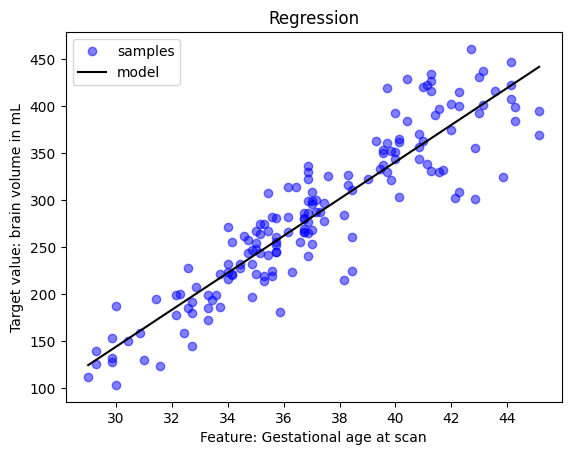

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the data
plt.plot(X, y, 'bo', alpha = 0.5, label = 'samples')

# Plot the model
plt.plot(X_model, y_model, 'k', label = 'model')

# Annotate the plot
plt.title('Regression')
plt.xlabel('Feature: Gestational age at scan')
plt.ylabel('Target value: brain volume in mL')
plt.legend()

plt.show()

Note that the points mostly lie near the line defined by the linear model. This is a visual representation of the $R^2$ score.

**Note:** When the data points are closely packed around the line produced by the linear model, **it's a visual indication that the model is a good fit for the data. In technical terms, a high $R^2$ score would mean that a large percentage of the variance in the target variable (in this case, brain volume in mL) can be explained by the feature (Gestational age at scan).**

So, when you look at the plot and see the points hugging the line, you can be pretty confident that your **$R^2$ score is going to be high**, indicating a good model fit.

In other words, when we say "a high 𝑅² score means a large percentage of the variance in brain volume can be explained by the gestational age," we mean that a high 𝑅² score indicates that **knowing the gestational age allows us to make very good predictions about the brain volume.** It means the gestational age has a strong relationship with the brain volume, and we can use it to estimate the brain volume quite accurately, with a good deal of confidence.

**Comic time**

<img src="https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-2-Introduction-to-machine-learning/imgs/cartoon_guide_regression.png" width = "500" style="float: right;">



### Exercise 1

It is now your turn to write the solution to the following problem: You would like to predict the GA of a preterm baby from the measurement of the brain volume. Note that in this case the GA and volumes switched roles - volume is a feature and GA is the target value. The feature matrix `X1` and target vector `y1` were created for you.

Write code to
* Create the `LinearRegression` model
* Fit the model
* Calculate the $R^2$ score

Commands for printing out the score and the equation of the fitted model were created for you.

In [ ]:
# Create the feature matrix using brain volumes
X1 = brain_volume_data[:,1].reshape(-1,1)

# Create the target vector using GA
y1 = brain_volume_data[:,0]

# Create the model
lr_model1 = None # Edit this line

# Fit the model
# Add your code here

# Calculate the R2 score
r2_1 = None # Edit this line

# Print the score
#print('R2 score:', round(r2_1,2))

# Print the equation of the fitted model
#print('Fitted model: y = {} + {}x'.format(round(lr_model1.intercept_), round(lr_model1.coef_[0],2)))

## Example 2. Classification

We'll explore the topic of classification in depth in Week 3. This is just a simple overview for now.

In machine learning, classification refers to the **task of assigning a label to an input based on certain features or attributes**. Essentially, it's like sorting things into different buckets or groups.

<img src="https://raw.githubusercontent.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/main/Week-2-Introduction-to-machine-learning/imgs/apple_oranes.png" width = "400" style="float: right;">

For example, imagine you have a bunch of fruits, and you want to classify them as either "apple," "banana," or "cherry." You could use **features** like color, shape, and size to make that decision. In machine learning, you would use a classification algorithm **to learn the characteristics that define each fruit type based on training data**. Once the algorithm is trained, you could give it a new, unknown fruit, and it would be able to classify it into one of the existing categories.

Common algorithms used for classification tasks include **Logistic Regression**, **Decision Trees**, and **Support Vector Machines**, among others. Each algorithm has its own way of **dividing the feature space into regions**, each corresponding to a particular label or class.

So, whether you're sorting fruits, identifying spam emails, or recognizing handwritten digits, classification algorithms are the go-to tools for these types of tasks.

Now, let's focus on our main example:

###**Predict the heart failure from EF and GLS**

<img src="https://raw.githubusercontent.com/SirTurtle/ML-BME-UofA-imgs/main/Week-2-Introduction-to-machine-learning/imgs/HeartSegmentation.gif" width = "150" style="float: right;">

This example demonstrates the __classifier__ object API.

The file 'heart_failure_data.csv' contains **features Ejection Fraction** (EF), **Global Longitudinal Strain** (GLS) and a **label indicating whether patient has heart failure (HF)**. We will fit a linear `Perceptron` model to predict the heart failure from EF and GLS.

A [linear perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) is simple model that **will find a line** (or in higher dimensions a plane or hyper-plane) that **divides the data into classes. This is the *decision boundary*.** Perceptrons can be used for binary classification (as here), and also for multiclass problems.

We will cover classification in more detail in **Week 3**.



In [ ]:
# Download the data
download_data('Week-2-Introduction-to-machine-learning/data/heart_failure_data.csv', 'temp/heart_failure_data.csv')

### Prepare the data
First we will import the file using the `pandas` package and check its content.

In [ ]:
# Read data file into a dataframe object
df = pd.read_csv('temp/heart_failure_data.csv')

# Print the first few lines
df.head()

#### Data dictionary

**Note** **Global Longitudinal Strain (GLS)** is a modern echocardiographic parameter that provides a more detailed analysis of **cardiac function** compared to traditional measurements like Ejection Fraction (EF). While EF gives an **overall idea of how well the heart is pumping**, GLS specifically looks at the **ability of the heart muscle to contract and stretch along its length**.

read more about features Ejection Fraction (EF), Global Longitudinal Strain (GLS) [read more](https://docs.google.com/document/d/1O8onYcy3Q_J6qBC4zzyOwqAktgPGM0Izqmudi-Qce8Q/edit)

***EF*: Ejection Fraction**. A measurement of how much blood the left ventricle pumps out with each contraction. Expressed as a percent in the range 0 to 100.

***GLS*: Global Longitudinal Strain**. A measurement of myocardial deformation along the longitudinal cardiac axis. Expressed as a negative percent in the range 0 to -100.

***HF*: Heart Failure class**.
- 0 = Healthy
- 1 = Heart failure

The code below creates the feature matrix `X` and label vector `y`. Note that now the feature matrix has dimension N x 2.

Also, we will do some preprocessing on the data: **we will scale the features to have zero mean and unit variance across the dataset.**

*Tip*: This preprocessing is called ***standardization* or *normalization***. This is important for many types of models and will make it easier for the model to fit your data. It is particularly important if your features differ by orders of magnitude.

In [ ]:
# Import and create an object to scale the features
# to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Convert to numpy
heart_failure_data = df.to_numpy()

# Create feature matrix containing EF and GLS
X = scaler.fit_transform(heart_failure_data[:,:2])
print('Feature matrix X dimensions: ', X.shape)

# Create target vector containing HF
y = heart_failure_data[:,2]
print('Target vector y dimensions: ', y.shape)

### Create the model
This code creates the `Perceptron` model.

In [ ]:
from sklearn.linear_model import Perceptron

# Create the model
p_model = Perceptron()

### Fit the model
This code fits the `Perceptron` model to the training data

In [ ]:
# Fit the model
p_model.fit(X, y)

The coefficients of the fitted decision function
$h(\mathbf{x})=w_0+w_1x_1+w_2x_2$ can be accessed as follows

In [ ]:
w0 = p_model.intercept_[0]
print('w0:', round(w0))

w1 = p_model.coef_[0][0]
print('w1:', round(w1))

w2 = p_model.coef_[0][1]
print('w2:', round(w2,2))

### Evaluate the model
For classification models, the function `score` returns accuracy, which is the proportion of the correctly classified samples.

In [ ]:
# Calculate accuracy
accuracy = p_model.score(X, y)

# Print the score
print('Accuracy score:', round(accuracy,2))

Accuracy will be in the range [0,1], with 1 being perfect accuracy.

### Plot the model
The result of the classification is plotted below.

Note that for this example is easy to visualize the decision boundary since we have 2 features. In higher dimensions, this type of visualization would not work!

Remember also that we standardized our features before fitting.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot data
plt.plot(X[y==0,0], X[y==0,1], 'bo', alpha=0.75, label = 'Healthy')
plt.plot(X[y==1,0], X[y==1,1], 'r*', alpha=1, label = 'Heart Failure')

# Plot decision boundary
# Define y-coordinates
x2 = np.array([X[:,1].min(), X[:,1].max()])

# Define x-coordinates
x1 = -(w0 + w2*x2)/w1

# Plot
plt.plot(x1, x2, "k-")

plt.legend()
plt.title('Classification')
plt.xlabel('Feature 1: Ejection Fraction')
plt.ylabel('Feature 2: Global Longitudinal Strain')

The line is our model's decision boundary between the two classes (healthy and heart failure).

### Exercise 2

Write a solution to the following problem: You would like to find out whether using only Ejection Fraction (EF) would be sufficient to predict heart failure (HF).

Write code to
* Create the new feature matrix and the target vector
* Fit the model and calculate the accuracy score
* Print the equation of the decision boundary

What is the drop in accuracy compared to using both features (EF and GLS)?

*Hint*: If your accuracy is not good, try changing the learning rate by changing the eta0 learning rate hyperparameter from the default:
`Perceptron(eta0=0.2)`

In [ ]:
# Create feature matrix containing EF only
X2 = None # Edit this line

# Create label vector containing HF
y2 = None # Edit this line

# Create the model
from sklearn.linear_model import Perceptron
p_model2 = Perceptron(eta0=0.2)

# Fit the model
# Add your code here

# Calculate accuracy
accuracy2 = None # Edit this line

# Print the score
#print('Accuracy score is:', round(accuracy2,2))

# Print the decision boundary
#print('Decision boundary: {} + {}x = 0'.format(round(p_model2.intercept_[0],2),round(p_model2.coef_[0][0],2)))

## Example 3. Clustering
<img src="https://raw.githubusercontent.com/SirTurtle/ML-BME-UofA-imgs/main/Week-2-Introduction-to-machine-learning/imgs/T1.png" width = "150" style="float: right;">

This example demonstrates the __cluster__ object API.

The file 'T1.png' contains a slice of T1-weighted magnetic resonance image (MRI) of an adult brain. The non-brain tissues have been removed in **preprocessing**. We perform `KMeans`) clustering to segment white matter (WM), grey matter (GM) and cerebrospinal fluid (CSF) in this image.

[read more](https://github.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/blob/main/Week-2-Introduction-to-machine-learning/data/GM_WM_CSF.docx) about WM, GM, and CFS.

This is an example of unsupervised learning. [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) is one of many clustering algorithms available in Scikit-Learn.

Note that in the previous examples, the data consisted of features in **tabular format**. In this case, the data is a **2D image**. **Each pixel** in the image could be black (representing non-brain tissues) or a shade of gray representing different types of brain tissue.

We will cover clustering in more detail in Week 5.

### Prepare the data
First we will load the image using the `matplotlib` function `imread` and display it.

Note: The **imread function** is a part of the **matplotlib.pyplot** module, and it is used for reading images in Python. It allows you to **read in image files into an array** that you can then manipulate using various Python libraries.

Inside the image array that you obtain after using imread are **numerical representations of the pixel values** that make up the image.

such as

Dimensions (The array usually has a shape of (height, width, channels)), Pixel Values, Data type, ...

In [ ]:
# Download data
download_data('Week-2-Introduction-to-machine-learning/data/T1.png', 'temp/T1.png')

# Load image
T1 = plt.imread('temp/T1.png')

# Display image
plt.imshow(T1, cmap = 'gray')

# Print shape
print('Image dimensions: ', T1.shape)

Visually it is easy to identify the 3 kinds of brain tissue **based on the shades of gray**. We will try to use clustering to identify these 3 kinds of brain tissue.

Next we need to convert the image into the feature matrix suitable for processing using `sklearn` functions. First, we need to **remove the background pixels that have values zero.** Then we need to create the feature matrix as a **2D array object** but with only one feature in each row.

Note that we are **"flattening" the 2D image**, turning it into a **single vector along x-axis**.

In [ ]:
# Find all the non-zero elements
ind = T1 > 0

# Create the feature matrix with the correct dimensions
X = T1[ind].reshape(-1,1)
print('Shape of the feature matrix X is', X.shape)

print('The first 10 entries of the feature matrix:\n', X[1:10])

**The** data values are what we visualized with different shades of gray. Notice that the numbers are not exactly the same for each brain region. We will use clustering to find boundaries between the grayscale values for each of the 3 classes.

### Create and fit the model

Now we are ready to perform **k-means clustering into 3 classes**, which will correspond to three brain tissues: WM, GM and CSF.

In [ ]:
from sklearn.cluster import KMeans

# Create the model
# random_state will initialize the random seed to fixed value
# n_init is the number of times the algorithm is run with different cluster centroid seeds
km_model = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model
km_model.fit(X)

# Fitted parameters
c = km_model.cluster_centers_
print(c.round(1).flatten())

### Predict the labels

The next step is the predict the labels. **Note that this time we did not calculate any score - this is because we do not have the training labels, so cannot evaluate the performance.**

In [ ]:
# Predict the labels
y_predict = km_model.predict(X)

### Plot the result
To plot the result, we need to reshape the predicted labels to the original 2D array and then we can display it as an image. We are using the "viridis" color map so each of the 3 clusters will appear in a different color. You could try a different color map such as "magma".

In [ ]:
# Create empty segmentation image
segmentation = np.zeros(T1.shape)

# Paste the labels into correct locations
# We can do this since we stored the original index of each non-zero
#    pixel in the ind array
segmentation[ind] = y_predict + 1

# Plot the segmentation
plt.imshow(segmentation, cmap = 'viridis')
plt.show()

### Exercise 3

Now perform the k-means clustering for the T2-weighted image 'T2.png'. Is the result similar?

In [ ]:
# Load image
download_data('Week-2-Introduction-to-machine-learning/data/T2.png', 'temp/T2.png')
T2 = plt.imread('temp/T2.png')

# Select non-zero pixels
ind2 = T2 > 0

# Create feature matrix
X2 = T2[ind2].reshape(-1,1)

# Create the model
km_model2 = None # Edit this line

# Fit the model
# Add your code here

# Predict the labels
y2 = None # Edit this line

# Create segmentation image
segmentation2 = None # Edit this line

# Paste the labels into correct locations
#segmentation2[ind2] = y2+1

# Plot the segmentation
#plt.imshow(segmentation2, cmap = 'viridis')
#plt.show()

# Fitted parameters
#c = km_model2.cluster_centers_
#print(c.round(1).flatten())

## Dimensionality reduction
<img src="https://raw.githubusercontent.com/SirTurtle/ML-BME-UofA-imgs/main/Week-2-Introduction-to-machine-learning/imgs/malignant.gif" width = "150" style="float: right;">

This example demonstrates dimensionality with [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

We will use a breast cancer dataset that is included with Scikit-Learn. It contains 30 features - properties of cells extracted using biopsy and photographed under a microscope - and labels whether the tumour was malignant or benign.

We will reduce the dimensionality of the feature vectors to 2 to visualise the patterns in this high-dimensional dataset.

We will cover dimensionality reduction in more detail in Week 5.

### Prepare the data

First we will load the dataset and check its structure.

In [ ]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

print(bc.keys())
print('\n Features: \n', bc.feature_names)
print('\n Labels: ', bc.target_names)

Next we will extract the feature matrix.

In [ ]:
X = bc.data
print('We have {} features and {} samples.'.format(X.shape[1], X.shape[0]))

### Create the model

We will use principal component analysis (PCA) with 2 dimensions.

In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)

### Fit the model

The model is fitted using function `fit`.

In [ ]:
pca_model.fit(X)
pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]
print('Component 1: \n', np.around(pc1, 3))
print('Component 2: \n', np.around(pc2, 3))

### Transform the features

Rather than predicting some outputs, the PCA model transforms the features using the function `transform`. We can check that transformed feature vectors are now 2-dimensional.

In [ ]:
X_reduced = pca_model.transform(X)
print('We have {} features.'.format(X_reduced.shape[1]))

### Plot the data

The code below visualises the projection of the breast cancer data on the first two principal components.

In [ ]:
Labels = bc.target

plt.plot(X_reduced[:, 0][Labels==0], X_reduced[:, 1][Labels==0], "r*", alpha = 0.5, label = 'malignant')
plt.plot(X_reduced[:, 0][Labels==1], X_reduced[:, 1][Labels==1], "bo", alpha = 0.5, label = 'benign')

plt.title('Dimensionality reduction')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()

### Exercise 4

The goal of this exercise is to compare the performance of a `Perceptron` classifier to detect breast cancer using the original and the reduced features.

First we will load the dataset and extract the feature matrix and label vector.

In [ ]:
from sklearn import datasets

# Load the data
bc = datasets.load_breast_cancer()

# Original dataset - feature matrix and label vector
X = bc.data
y = bc.target

The next step is to apply PCA to the feature matrix and check that the reduced matrix has only two features.

In [ ]:
from sklearn.decomposition import PCA

# Create PCA model with 2 components
pca_model2 = None # Edit this line

# Fit the model
# Add your code here

# Transform the feature matrix to 2-dimensional space
X_reduced = None # Edit this line

# Print number of features
#print('We have {} features.'.format(X_reduced.shape[1]))

Let's now compare the accuracy of classification using `Perceptron` when fitting to the original feature matrix `X` or reduced feature matrix `X_reduced`. Note that the labels vector `y` is the same in both cases.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# Create Perceptron model
clf = None # Edit this line

# Fit model using the original dataset
# Add your code here

# Calculate accuracy using the original dataset
#acc_orig = clf.score(scaler.fit_transform(X), y)
#print('Original dataset accuracy: ',round(acc_orig, 2))

# Fit model using the reduced dataset
# Add your code here

# Calculate accuracy using the reduced dataset
#acc_reduced = clf.score(scaler.fit_transform(X_reduced), y)
#print('Reduced dataset accuracy: ',round(acc_reduced, 2))